<a href="https://colab.research.google.com/github/DiogoBotton/FIAP_Heart_Disease/blob/dev/ECG_Arrhythmia_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ajuste de estilo
%matplotlib inline
sns.set(style='whitegrid', palette='muted')

In [11]:
# Carregue cada arquivo CSV em um DataFrame
df_incart = pd.read_csv('INCART 2-lead Arrhythmia Database.csv')
df_mitbih = pd.read_csv('MIT-BIH Arrhythmia Database.csv')
df_supra = pd.read_csv('MIT-BIH Supraventricular Arrhythmia Database.csv')
df_holter = pd.read_csv('Sudden Cardiac Death Holter Database.csv', low_memory=False) # para resolver o problema de tipos mistos

In [13]:
# Verifique o número de linhas para o DataFrame do INCART
print(f"O DataFrame carregado como 'df_incart' tem {df_incart.shape[0]} linhas.")

# Verifique o número de linhas para o DataFrame do MIT-BIH Arrhythmia
print(f"O DataFrame carregado como 'df_mitbih' tem {df_mitbih.shape[0]} linhas.")

# Verifique o número de linhas para o DataFrame do MIT-BIH Supraventricular
print(f"O DataFrame carregado como 'df_supra' tem {df_supra.shape[0]} linhas.")

# Verifique o número de linhas para o DataFrame do Sudden Cardiac Death Holter
print(f"O DataFrame carregado como 'df_holter' tem {df_holter.shape[0]} linhas.")


O DataFrame carregado como 'df_incart' tem 175729 linhas.
O DataFrame carregado como 'df_mitbih' tem 100689 linhas.
O DataFrame carregado como 'df_supra' tem 184428 linhas.
O DataFrame carregado como 'df_holter' tem 502808 linhas.


In [15]:
# Crie uma lista com os DataFrames que você quer combinar
lista_de_dataframes = [df_incart, df_mitbih, df_supra, df_holter]

# Concatene todos os dataFrames em um único (é sabido que as colunas são iguais)
df_arritmias = pd.concat(lista_de_dataframes, ignore_index=True) # 'ignore_index=True' cria um novo índice sequencial

# Verifique as dimensões do novo DataFrame para confirmar a concatenação
print("O DataFrame arritmias foi criado com sucesso!")
print(f"Número total de linhas: {df_arritmias.shape[0]}")
print(f"Número total de colunas: {df_arritmias.shape[1]}")


O DataFrame arritmias foi criado com sucesso!
Número total de linhas: 963654
Número total de colunas: 34


In [16]:
# Dimensões do DataFrame
print("--- Dimensões do DataFrame ---")
print(f'{df_arritmias.shape[0]} linhas x {df_arritmias.shape[1]} colunas')

# Primeiras linhas
print("\n--- Primeiras 5 linhas do DataFrame ---")
display(df_arritmias.head())

# Informações gerais e valores ausentes
print("\n--- Informações Detalhadas ---")
df_arritmias.info()

# Estatísticas descritivas
print("\n--- Estatísticas Descritivas para Variáveis Numéricas ---")
display(df_arritmias.describe().T)

--- Dimensões do DataFrame ---
963654 linhas x 34 colunas

--- Primeiras 5 linhas do DataFrame ---


,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,I01,N,163.0,165.0,0.069610,-0.083281,0.614133,-0.392761,0.047159,15.0,...,-0.023370,14.0,3.0,23.0,6.0,-0.023370,-0.011650,0.082608,0.101373,-0.183387
1,I01,N,165.0,166.0,-0.097030,0.597254,-0.078704,-0.078704,-0.137781,3.0,...,0.081637,15.0,5.0,27.0,7.0,0.081637,0.102992,0.191225,0.217544,-0.068248
2,I01,N,166.0,102.0,0.109399,0.680528,-0.010649,-0.010649,-0.720620,6.0,...,-0.148539,33.0,13.0,52.0,6.0,-0.148539,-0.060620,0.081080,0.204400,0.335172
3,I01,VEB,102.0,231.0,0.176376,0.256431,-0.101098,-0.707525,-0.101098,4.0,...,0.046898,21.0,9.0,34.0,4.0,0.046898,0.083728,0.279512,0.526785,0.450969
4,I01,N,231.0,165.0,0.585577,0.607461,-0.083499,-0.083499,-0.167858,3.0,...,-0.112552,32.0,5.0,43.0,6.0,-0.112552,0.012989,0.091491,0.134004,0.265232



--- Informações Detalhadas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963654 entries, 0 to 963653
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record          887437 non-null  object 
 1   type            887437 non-null  object 
 2   0_pre-RR        887437 non-null  float64
 3   0_post-RR       887437 non-null  float64
 4   0_pPeak         887437 non-null  float64
 5   0_tPeak         887437 non-null  float64
 6   0_rPeak         887437 non-null  float64
 7   0_sPeak         887437 non-null  float64
 8   0_qPeak         887437 non-null  float64
 9   0_qrs_interval  887437 non-null  float64
 10  0_pq_interval   887437 non-null  float64
 11  0_qt_interval   887437 non-null  float64
 12  0_st_interval   887437 non-null  float64
 13  0_qrs_morph0    887437 non-null  float64
 14  0_qrs_morph1    887437 non-null  float64
 15  0_qrs_morph2    887437 non-null  float64
 16  0_qrs_morph3    887437 n

,count,mean,std,min,25%,50%,75%,max
0_pre-RR,887437.0,201.094300,79.775056,1.000000,140.000000,202.000000,258.000000,2228.000000
0_post-RR,887437.0,201.049294,80.443487,0.000000,140.000000,202.000000,258.000000,10964.000000
0_pPeak,887437.0,0.058577,0.189333,-4.208601,-0.027840,0.024179,0.099947,10.565904
0_tPeak,887437.0,0.437883,0.655515,-7.959463,-0.020446,0.220681,0.953379,4.738824
0_rPeak,887437.0,0.525119,0.756260,-7.113196,-0.027729,0.423092,0.962938,4.598265
0_sPeak,887437.0,-0.374234,0.695192,-7.971319,-0.693602,-0.360031,-0.030444,4.018918
0_qPeak,887437.0,-0.125992,0.276407,-7.113196,-0.141656,-0.074250,-0.029061,3.129033
0_qrs_interval,887437.0,17.880220,13.890492,0.000000,7.000000,16.000000,26.000000,232.000000
0_pq_interval,887437.0,9.840402,9.492744,1.000000,4.000000,7.000000,14.000000,150.000000
0_qt_interval,887437.0,45.083641,34.992659,2.000000,21.000000,35.000000,51.000000,334.000000


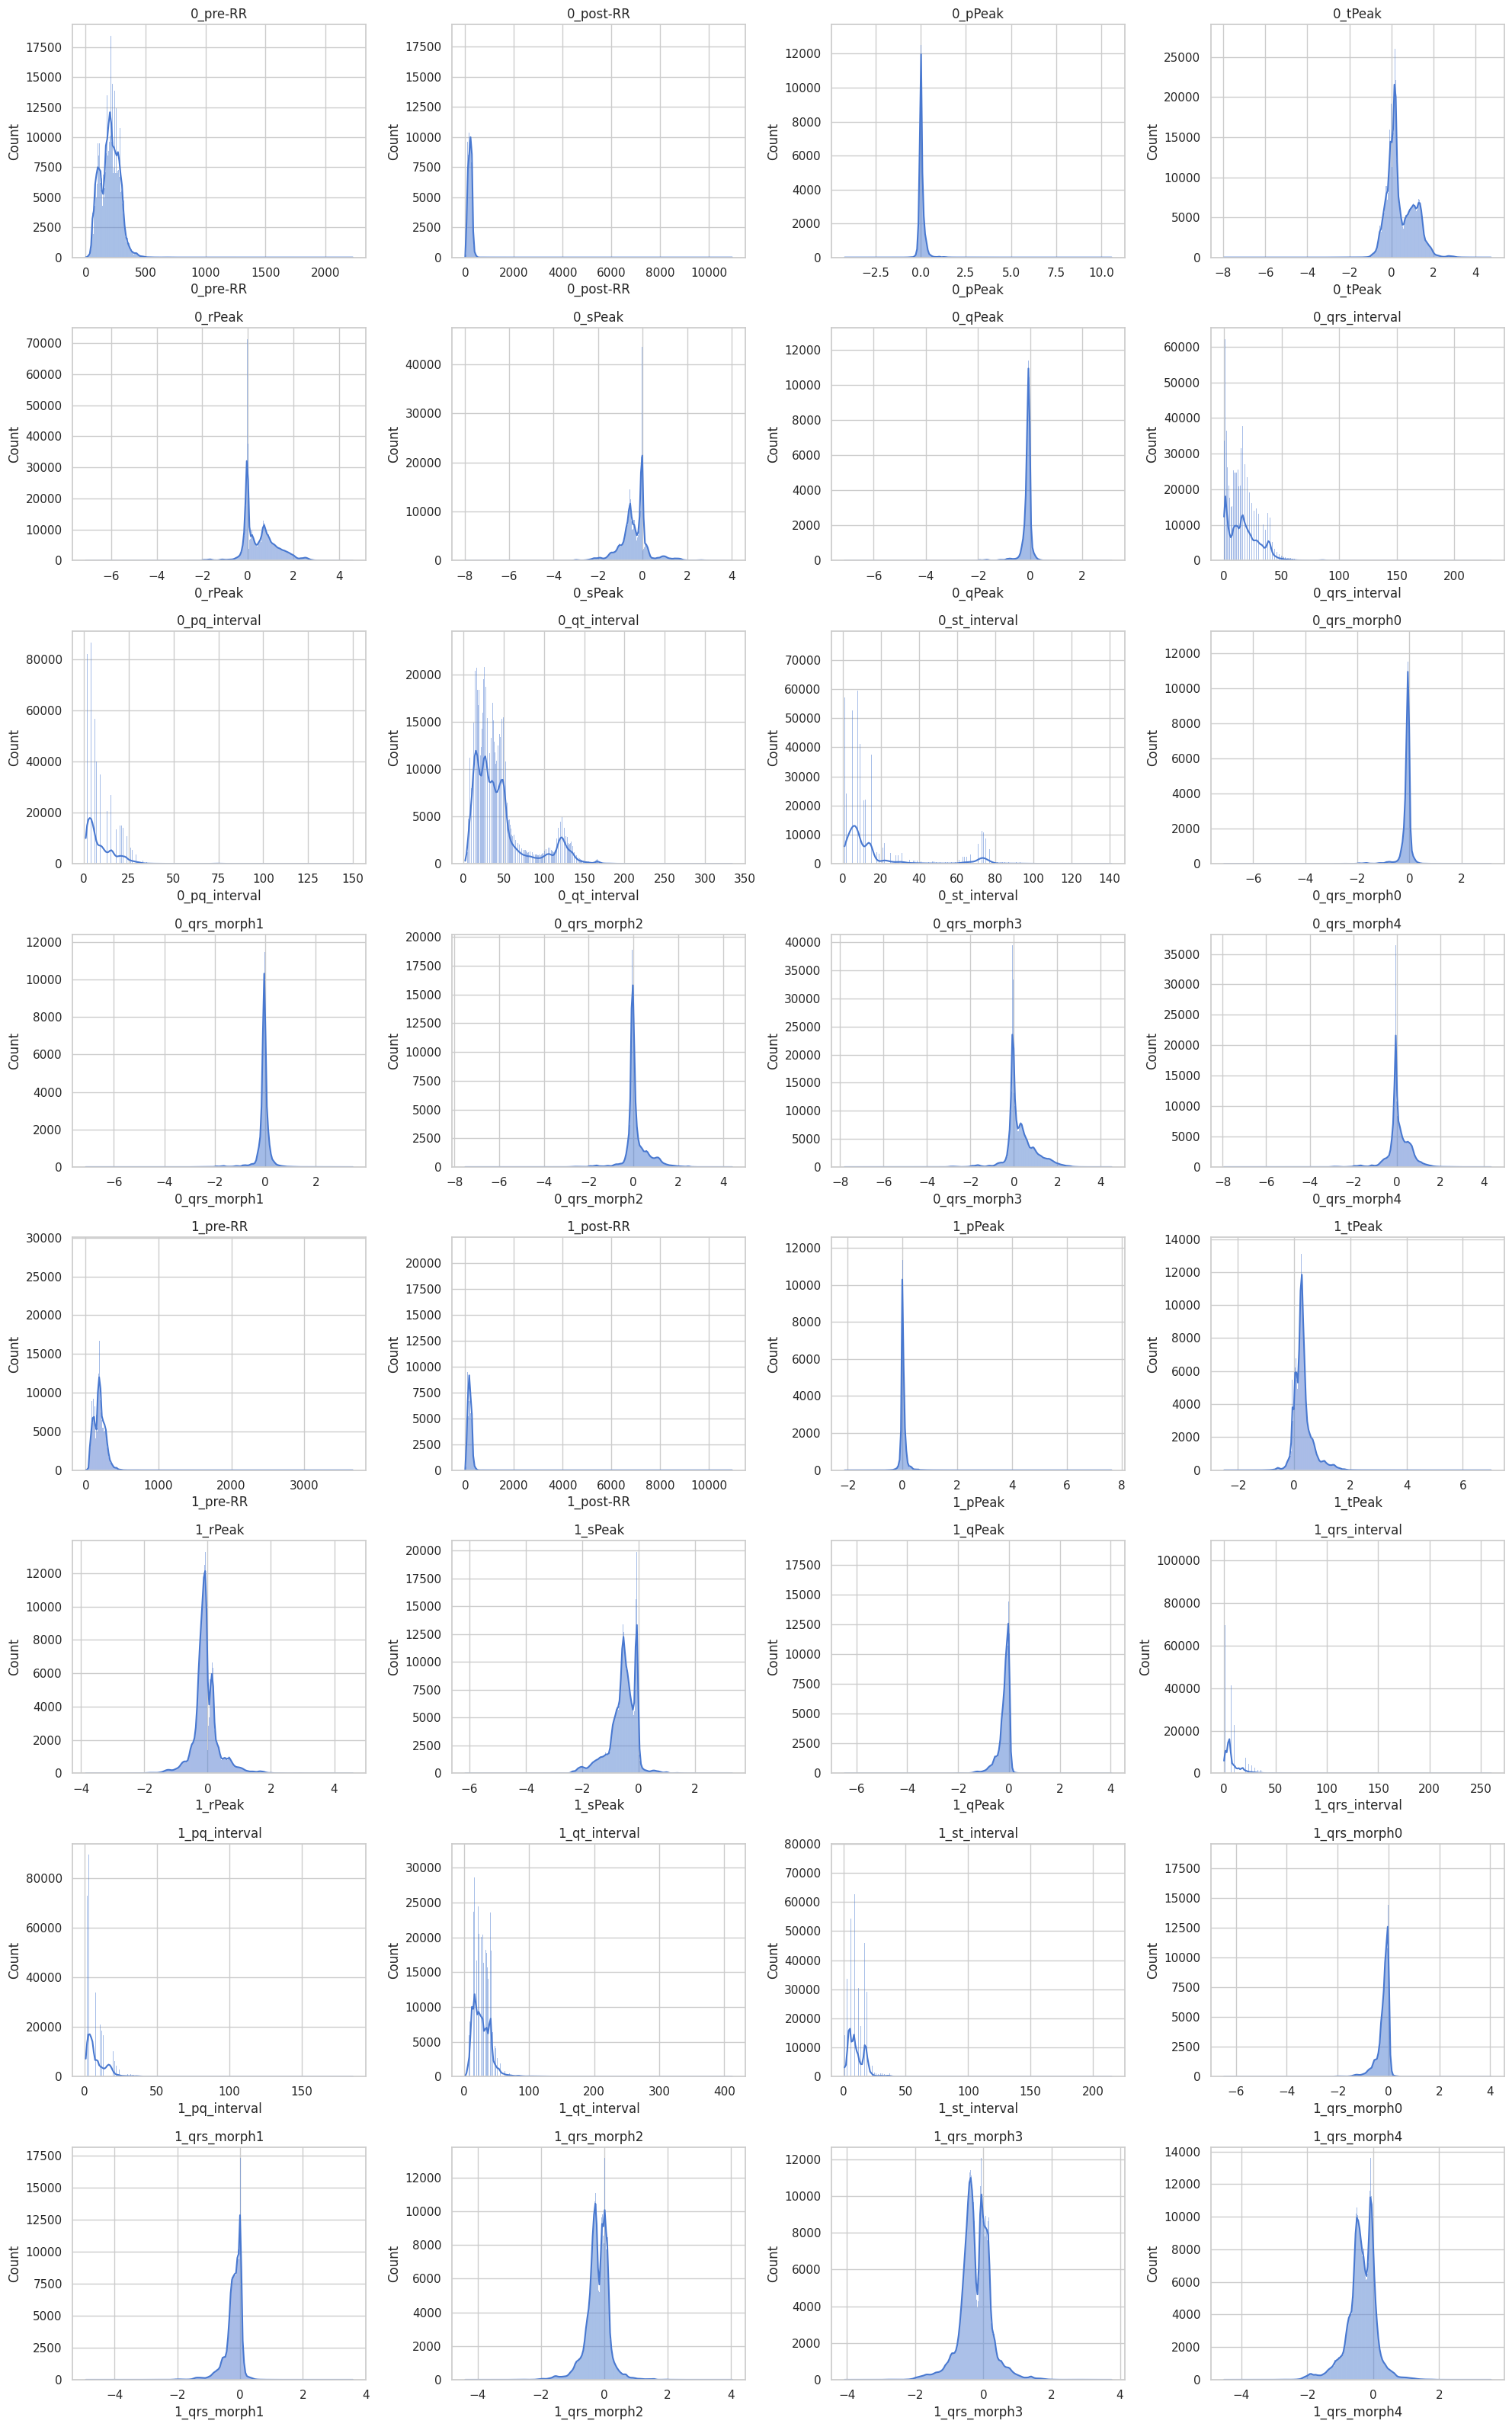

In [17]:
# Analise exploratoria
# Seleciona as colunas numéricas
num_cols = list(df_arritmias.select_dtypes(include='number').columns)
n = len(num_cols)

# Define o número de colunas para o grid e calcula o número de linhas
cols = 4
rows = (n - 1) // cols + 1

# Ajusta o tamanho da figura dinamicamente
plt.figure(figsize=(cols * 5, rows * 4))

# Itera para criar cada subgráfico
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df_arritmias[col].dropna(), kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


In [22]:
# Distribuição da Variável-Alvo (Type)
print("--- Distribuição dos Tipos de Batimento Cardíaco (Type) ---")
print(df['type'].value_counts(normalize=True).map('{:.2%}'.format))

print("\n--- Estatísticas Descritivas para as Características de ECG ---")

# Seleciona as variavies de interesse
features_de_interesse = [
    '0_pre-RR', '0_post-RR', '0_pPeak', '0_qrs_interval', '0_qt_interval',
    '0_rPeak', '0_sPeak', '0_tPeak', '1_pre-RR', '1_post-RR',
    '1_pPeak', '1_qrs_interval', '1_qt_interval', '1_rPeak',
    '1_sPeak', '1_tPeak'
]

# Análise Descritiva das Principais Características Numéricas
# Exibe as estatísticas para as variáveis selecionadas
print(df[features_de_interesse].describe().T)

--- Distribuição dos Tipos de Batimento Cardíaco (Type) ---
type
N       91.20%
VEB      5.82%
SVEB     2.09%
Q        0.75%
F        0.14%
Name: proportion, dtype: object

--- Estatísticas Descritivas para as Características de ECG ---
                   count        mean        std       min         25%  \
0_pre-RR        887437.0  201.094300  79.775056  1.000000  140.000000   
0_post-RR       887437.0  201.049294  80.443487  0.000000  140.000000   
0_pPeak         887437.0    0.058577   0.189333 -4.208601   -0.027840   
0_qrs_interval  887437.0   17.880220  13.890492  0.000000    7.000000   
0_qt_interval   887437.0   45.083641  34.992659  2.000000   21.000000   
0_rPeak         887437.0    0.525119   0.756260 -7.113196   -0.027729   
0_sPeak         887437.0   -0.374234   0.695192 -7.971319   -0.693602   
0_tPeak         887437.0    0.437883   0.655515 -7.959463   -0.020446   
1_pre-RR        789039.0  189.373106  77.861495  1.000000  130.000000   
1_post-RR       789039.0  189.282

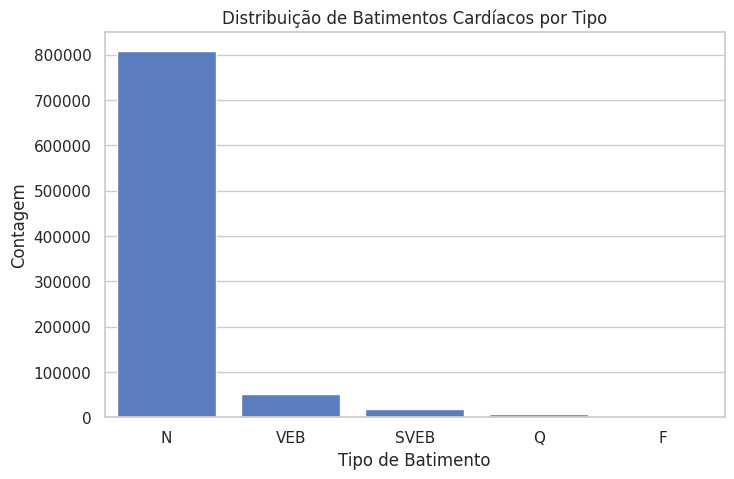

In [23]:
# Distribuição dos Tipos de Arritmia
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=df_arritmias, order=df_arritmias['type'].value_counts().index)
plt.title('Distribuição de Batimentos Cardíacos por Tipo')
plt.xlabel('Tipo de Batimento')
plt.ylabel('Contagem')
plt.show()

Gerando Histograma para a característica: 'pre-RR'


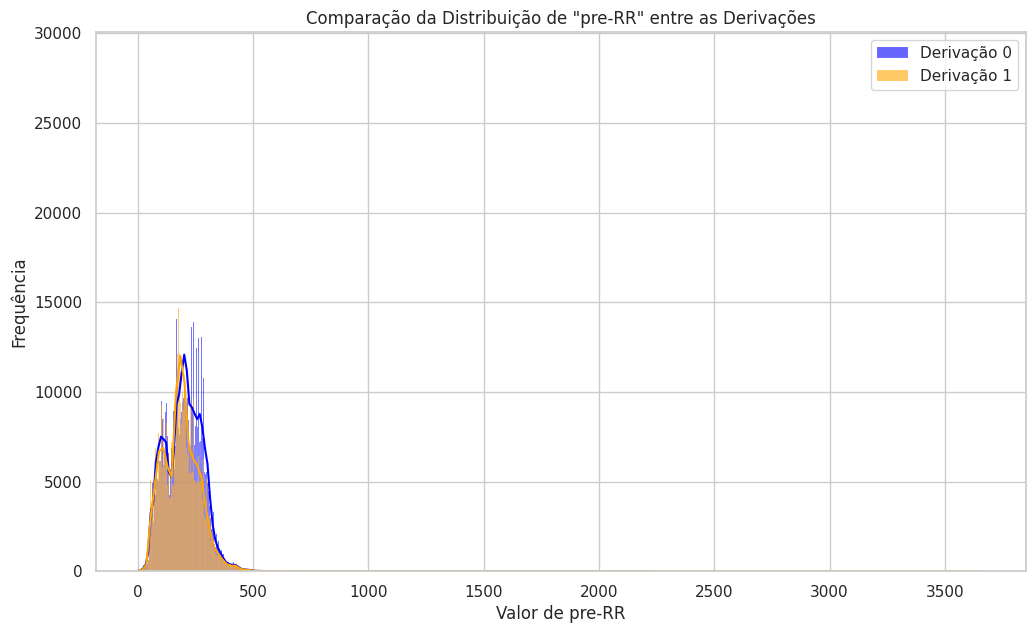

Gerando Boxplot para a característica: 'pre-RR'


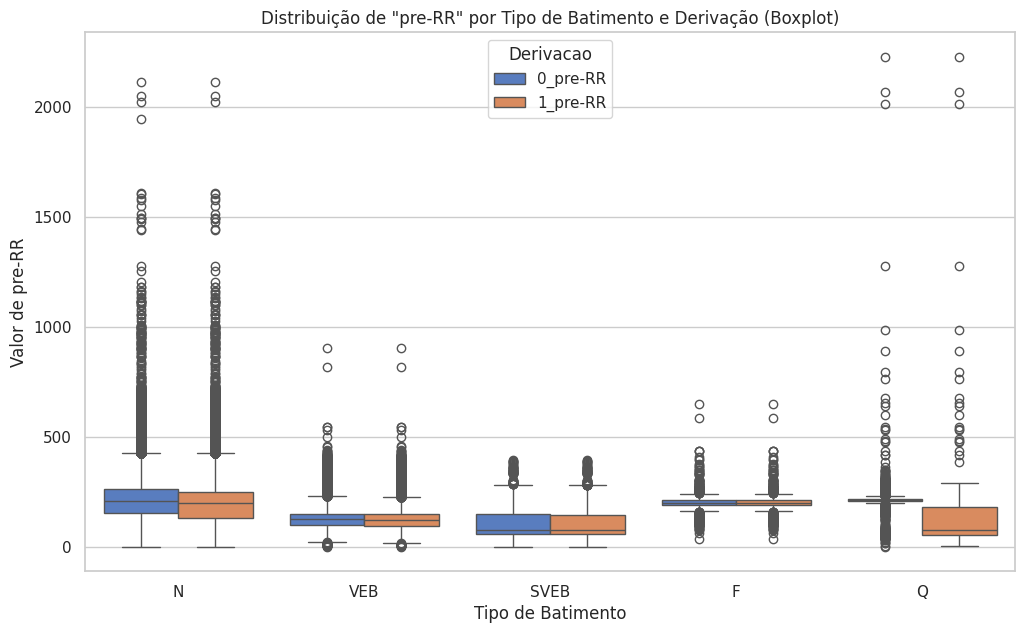

Gerando Gráfico de Violino para a característica: 'pre-RR'


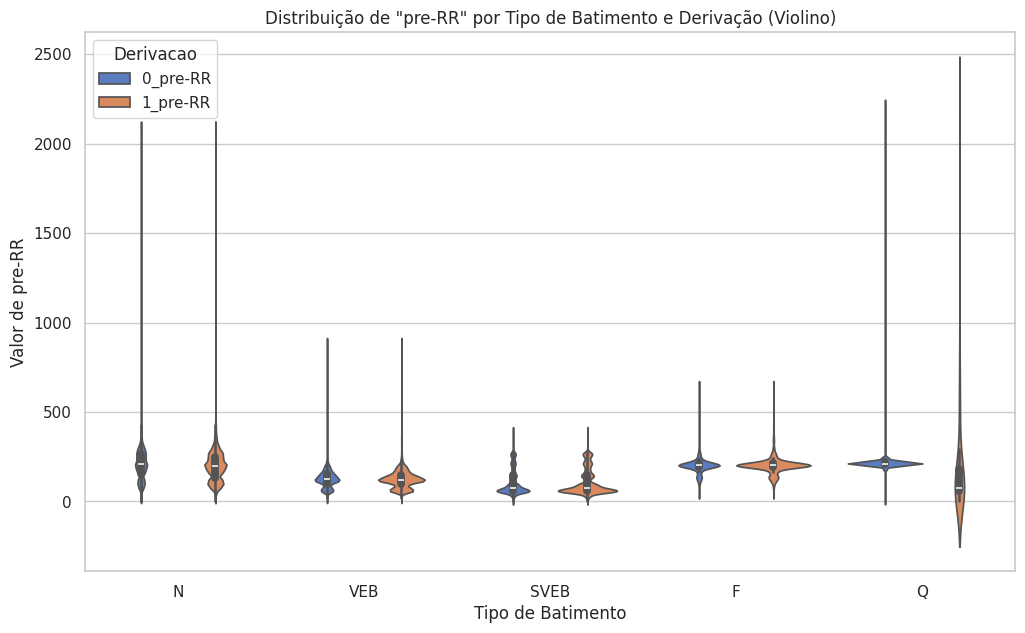

Gerando Histograma para a característica: 'post-RR'


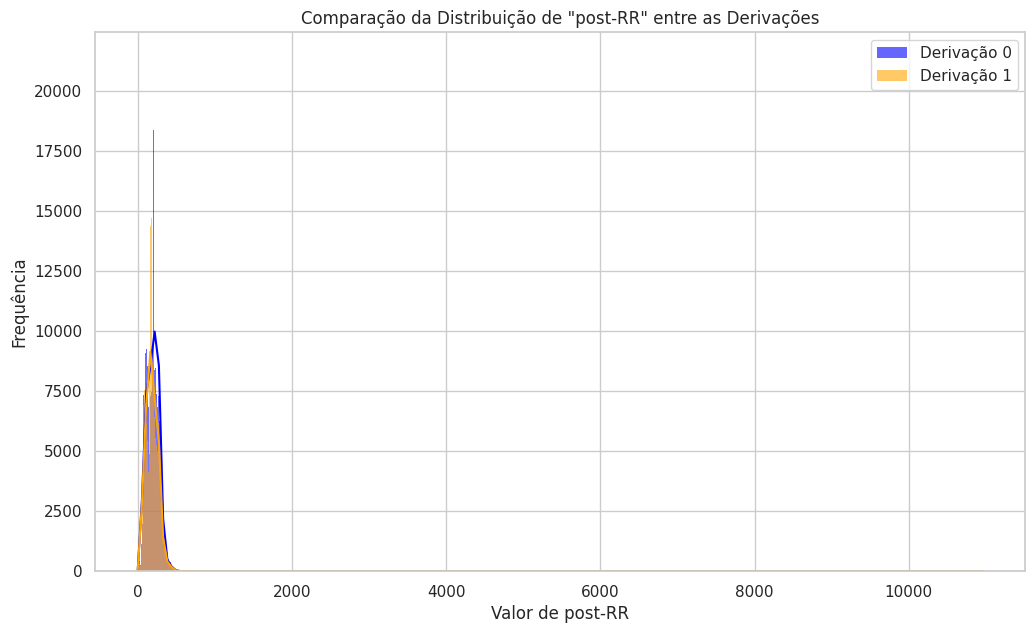

Gerando Boxplot para a característica: 'post-RR'


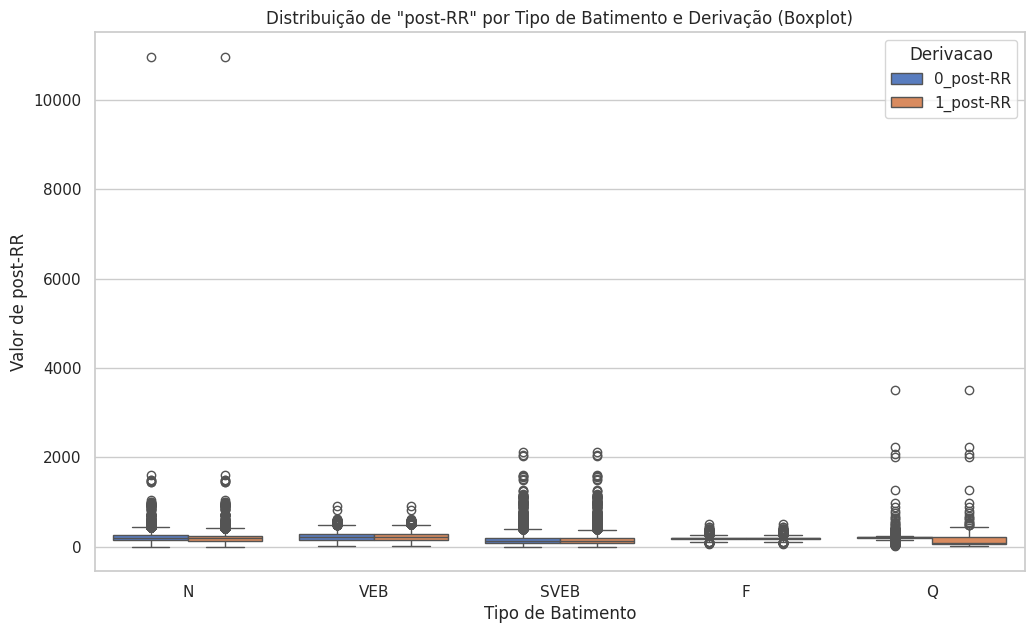

Gerando Gráfico de Violino para a característica: 'post-RR'


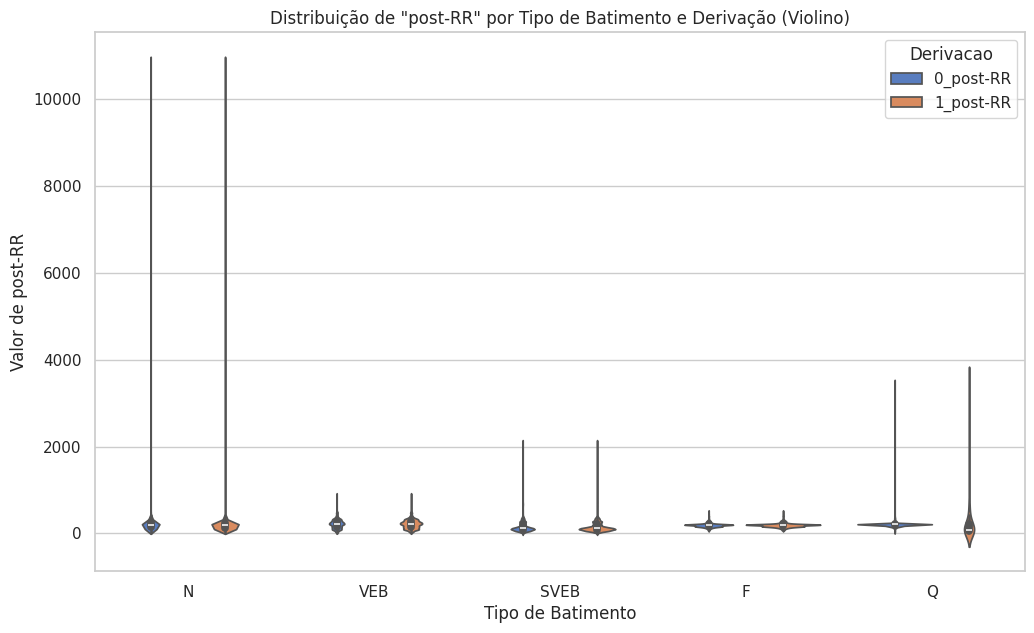

Gerando Histograma para a característica: 'pPeak'


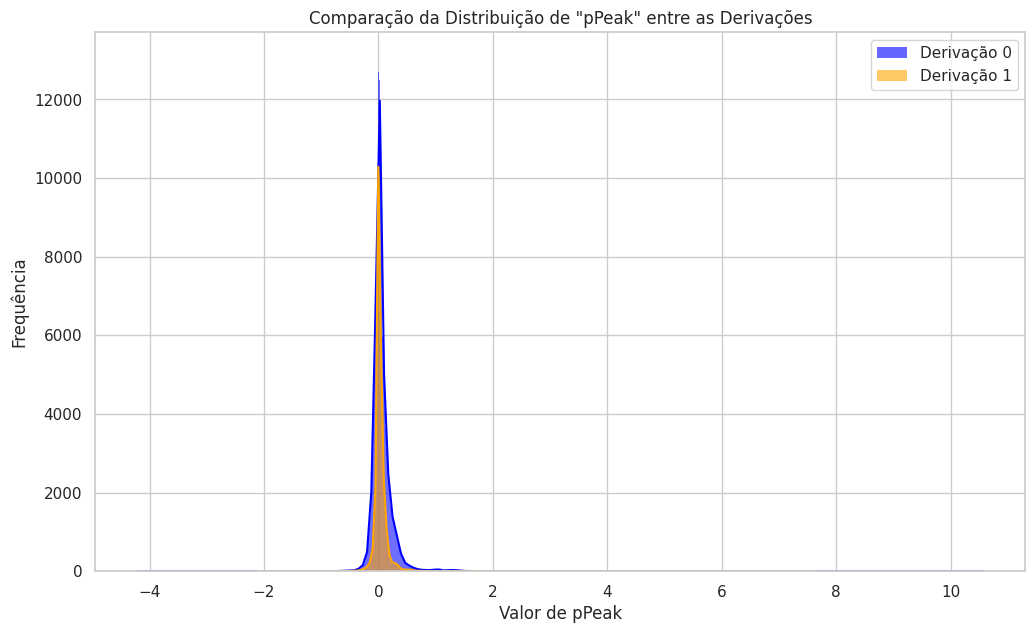

Gerando Boxplot para a característica: 'pPeak'


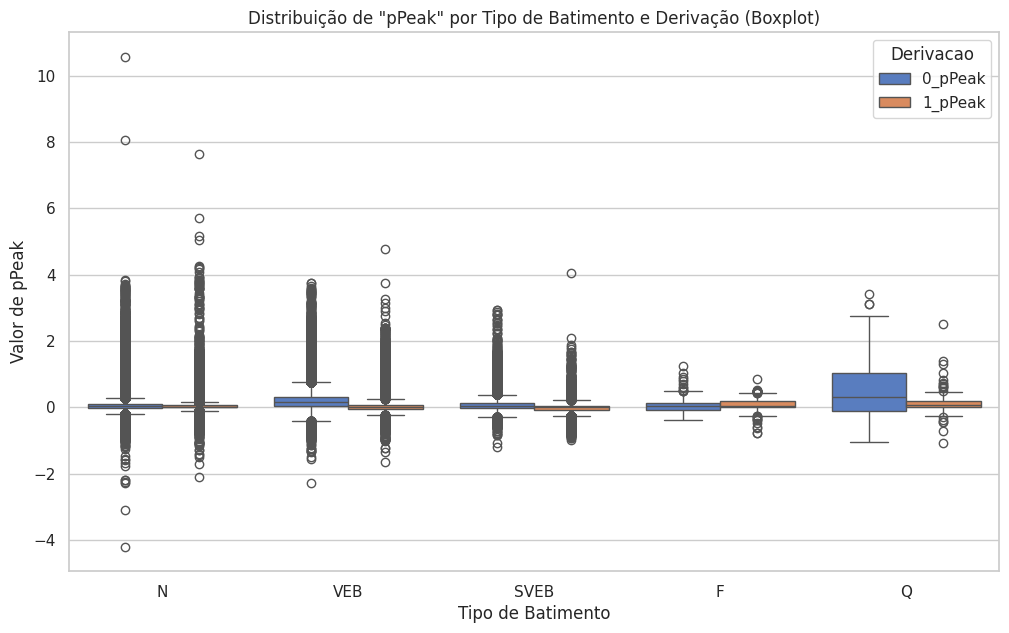

Gerando Gráfico de Violino para a característica: 'pPeak'


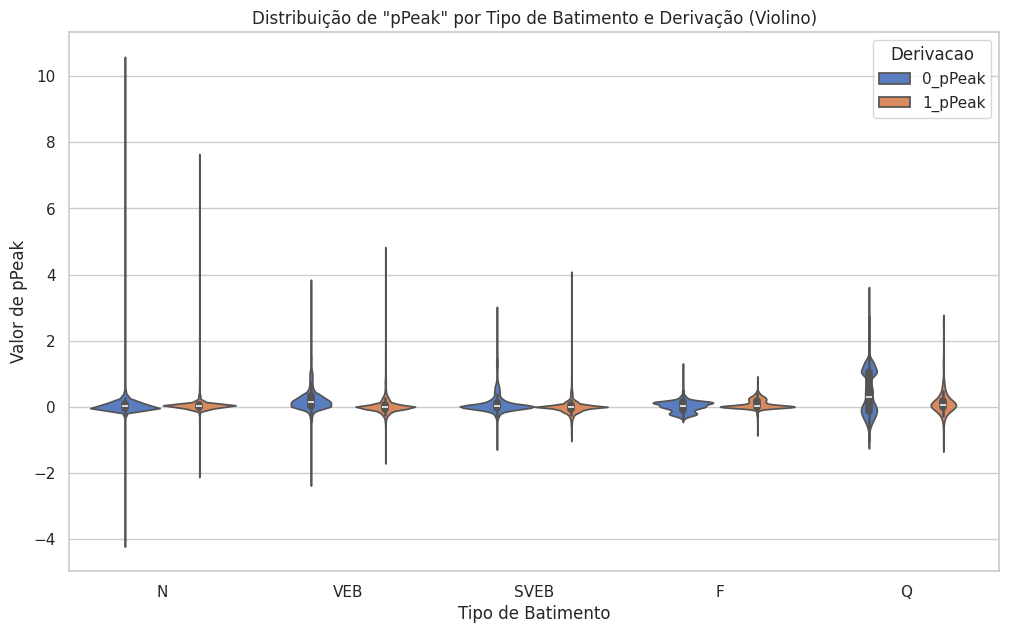

Gerando Histograma para a característica: 'qrs_interval'


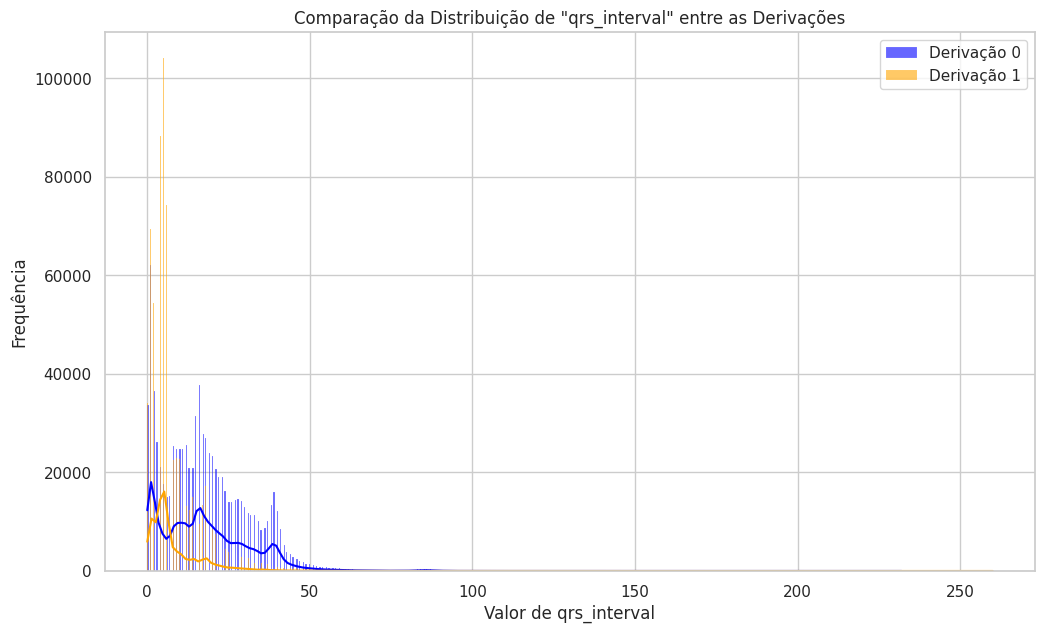

Gerando Boxplot para a característica: 'qrs_interval'


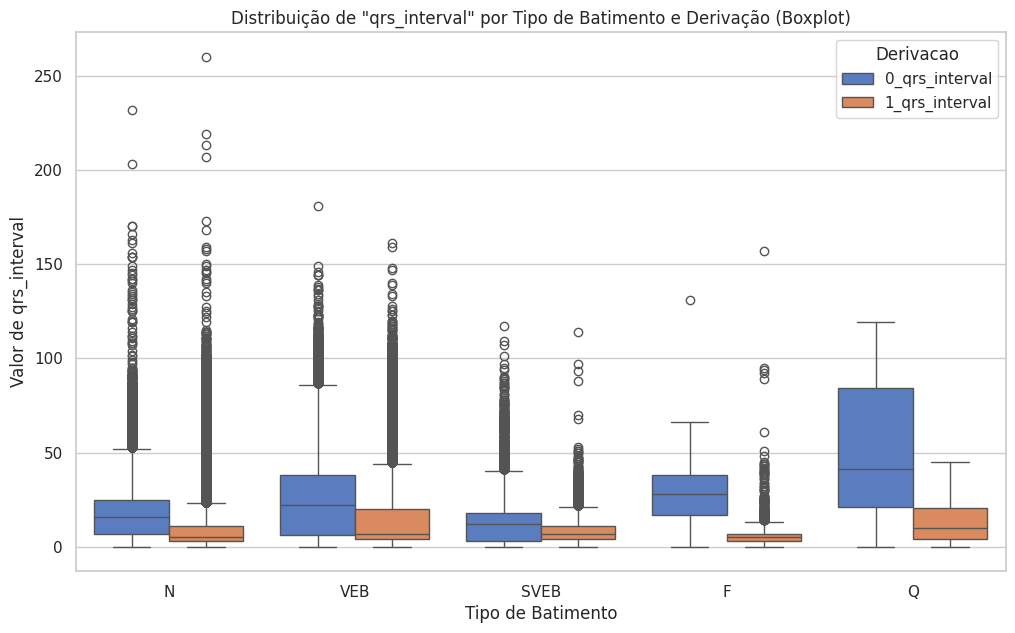

Gerando Gráfico de Violino para a característica: 'qrs_interval'


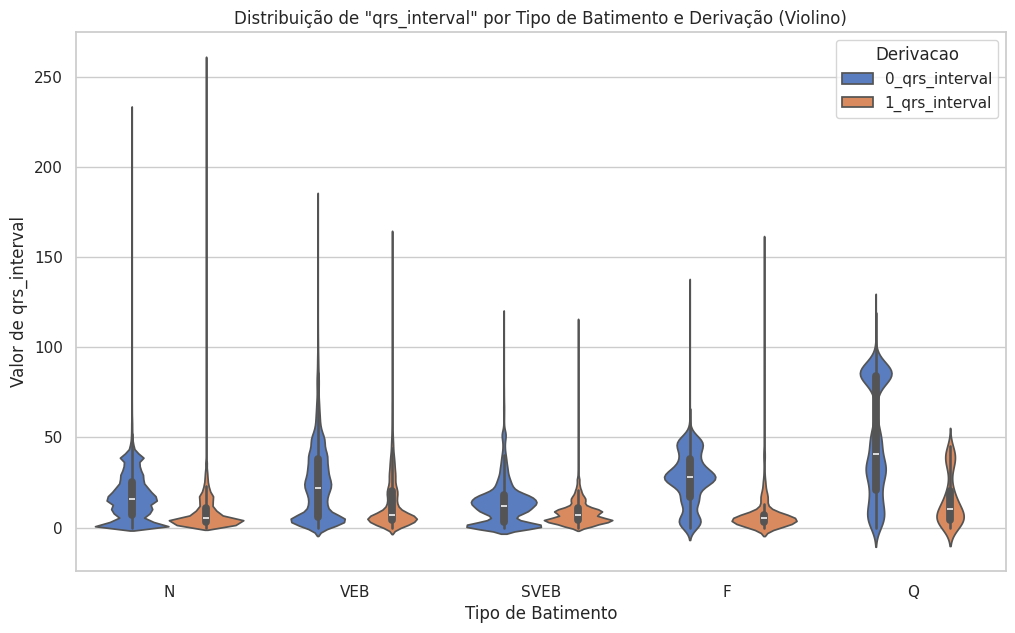

Gerando Histograma para a característica: 'qt_interval'


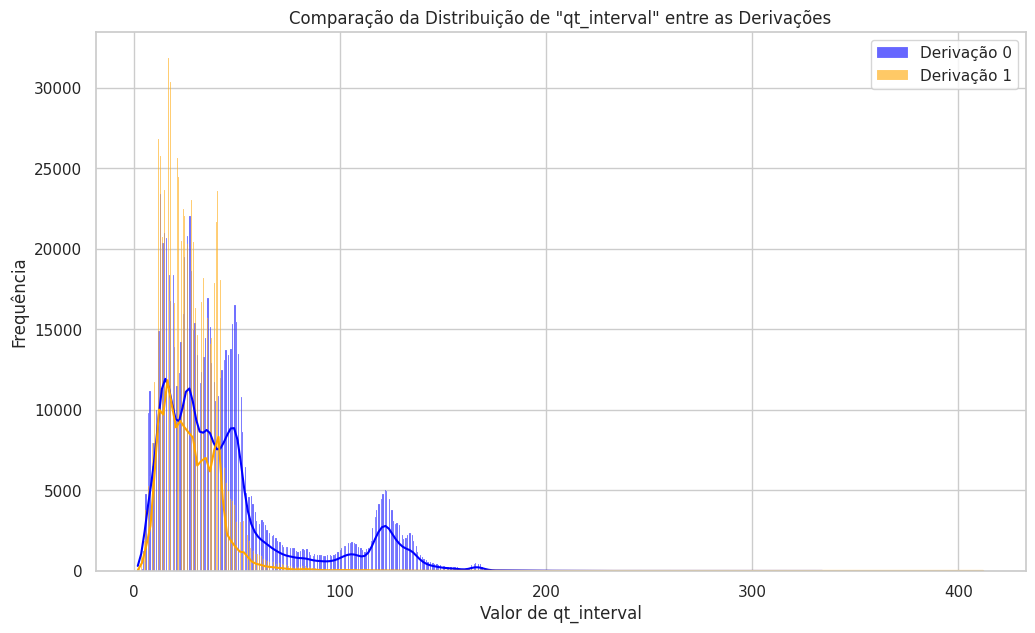

Gerando Boxplot para a característica: 'qt_interval'


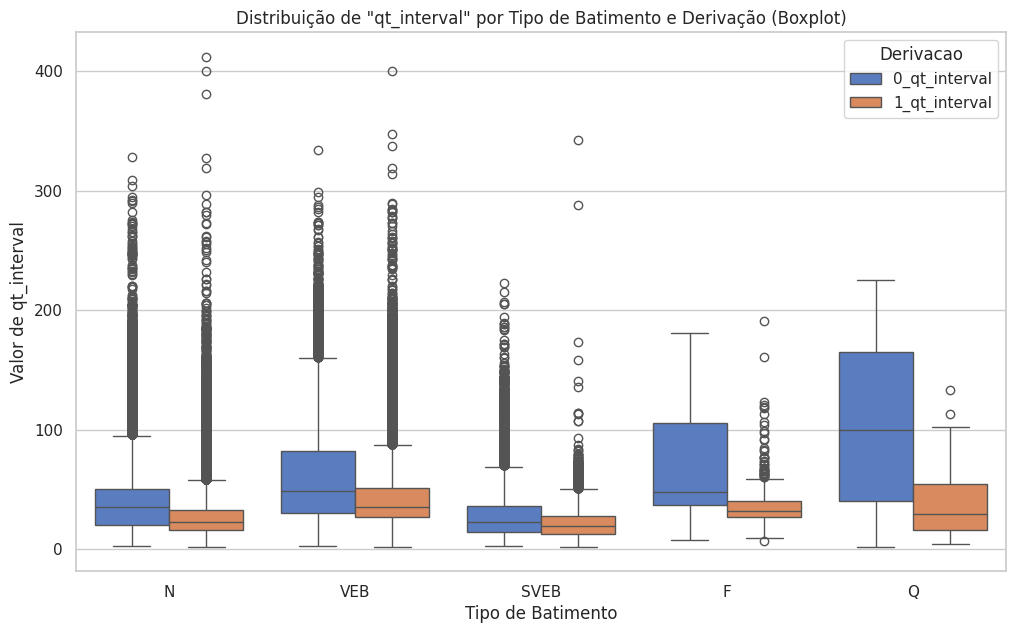

Gerando Gráfico de Violino para a característica: 'qt_interval'


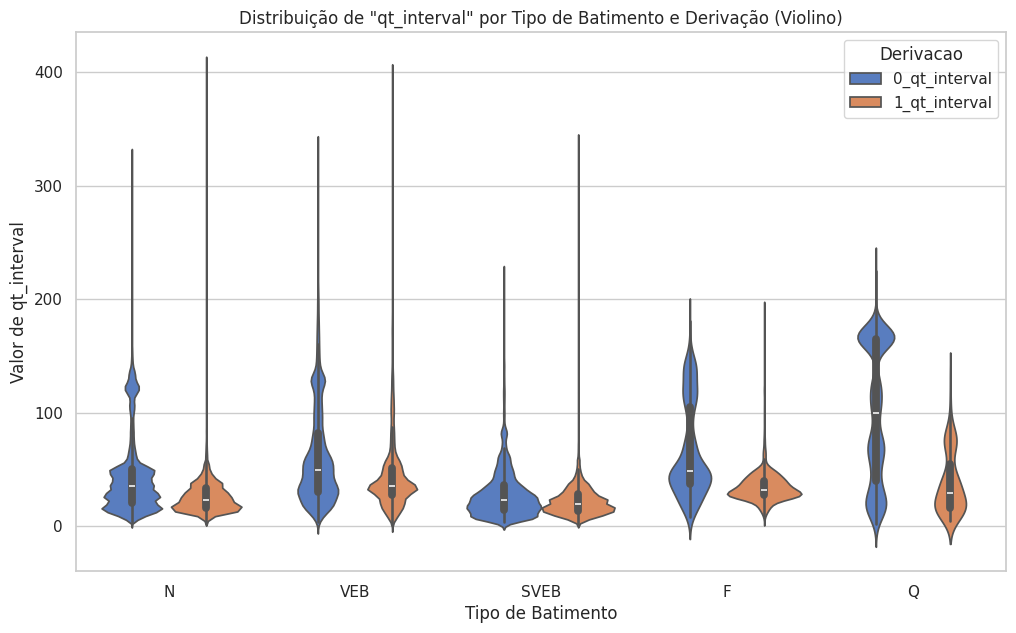

Gerando Histograma para a característica: 'rPeak'


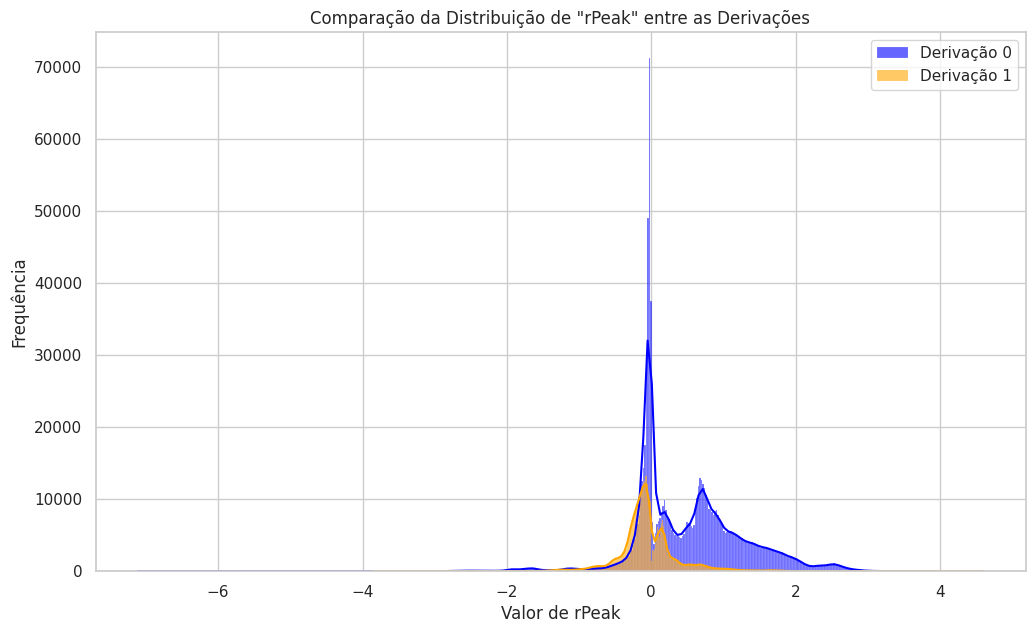

Gerando Boxplot para a característica: 'rPeak'


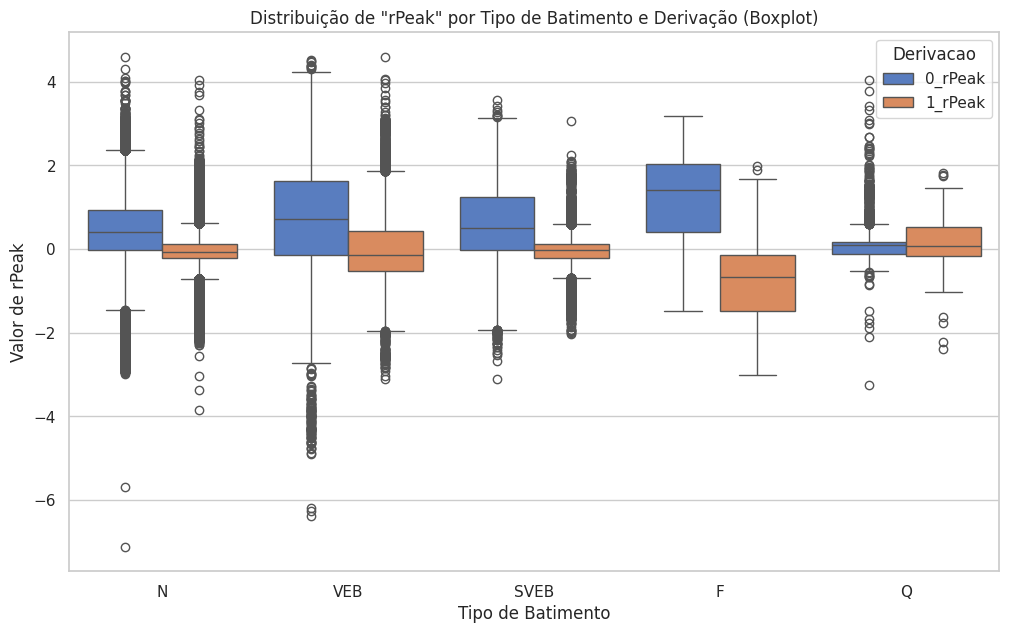

Gerando Gráfico de Violino para a característica: 'rPeak'


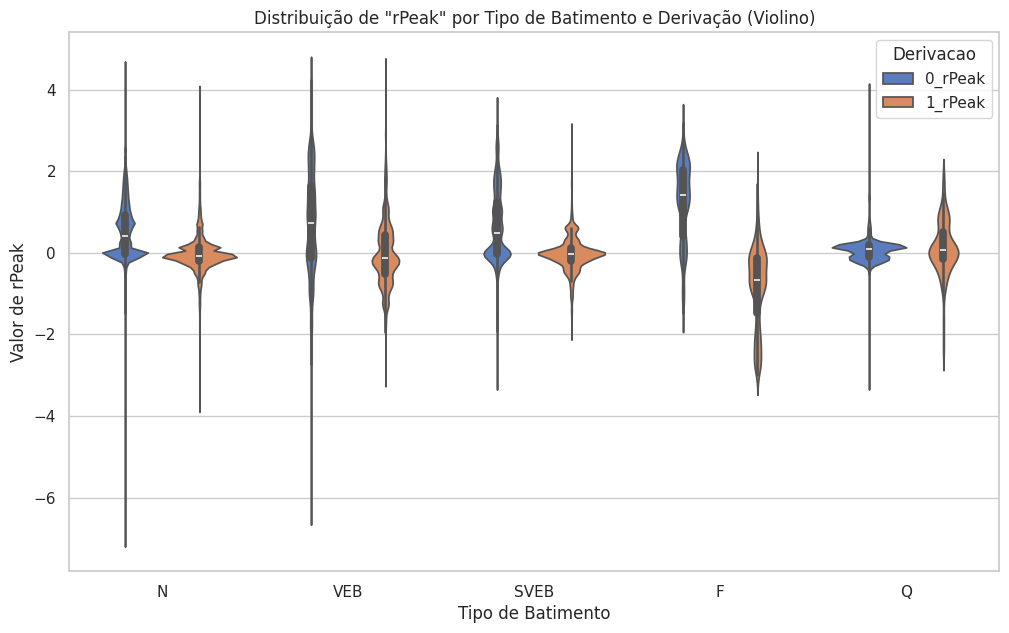

Gerando Histograma para a característica: 'sPeak'


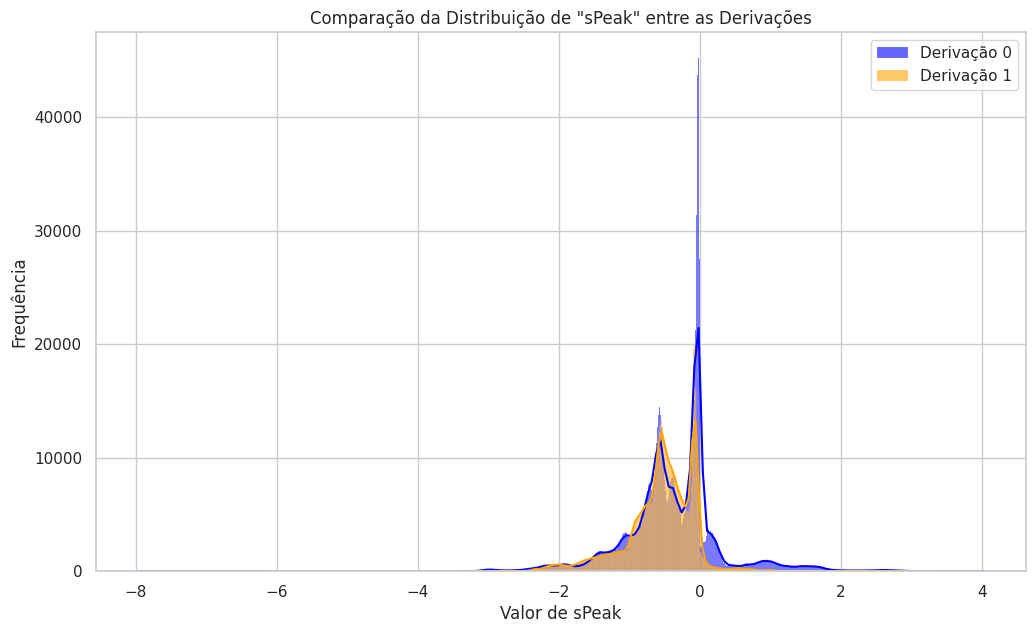

Gerando Boxplot para a característica: 'sPeak'


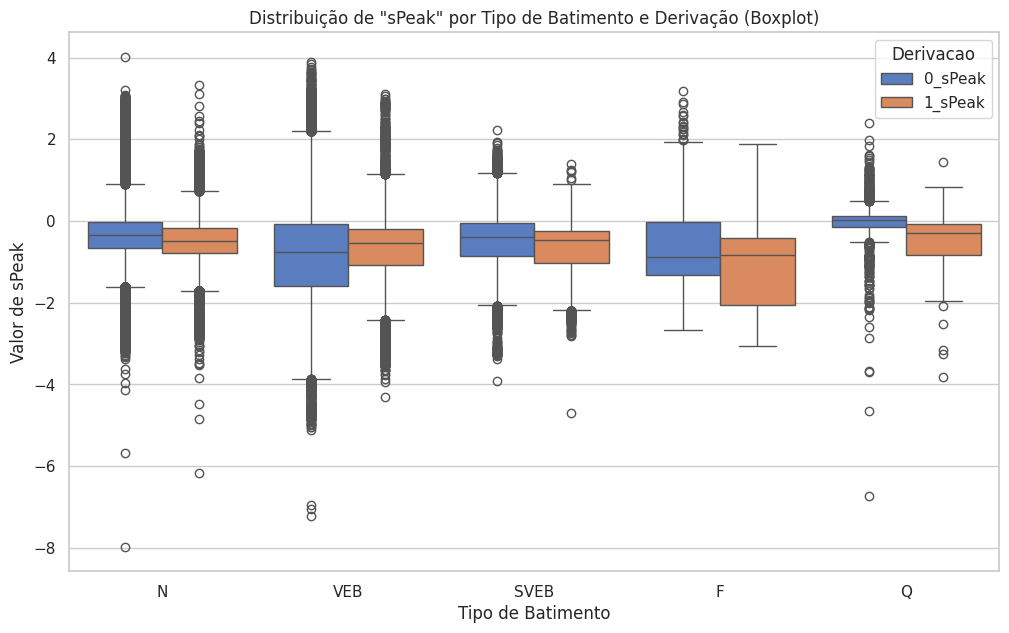

Gerando Gráfico de Violino para a característica: 'sPeak'


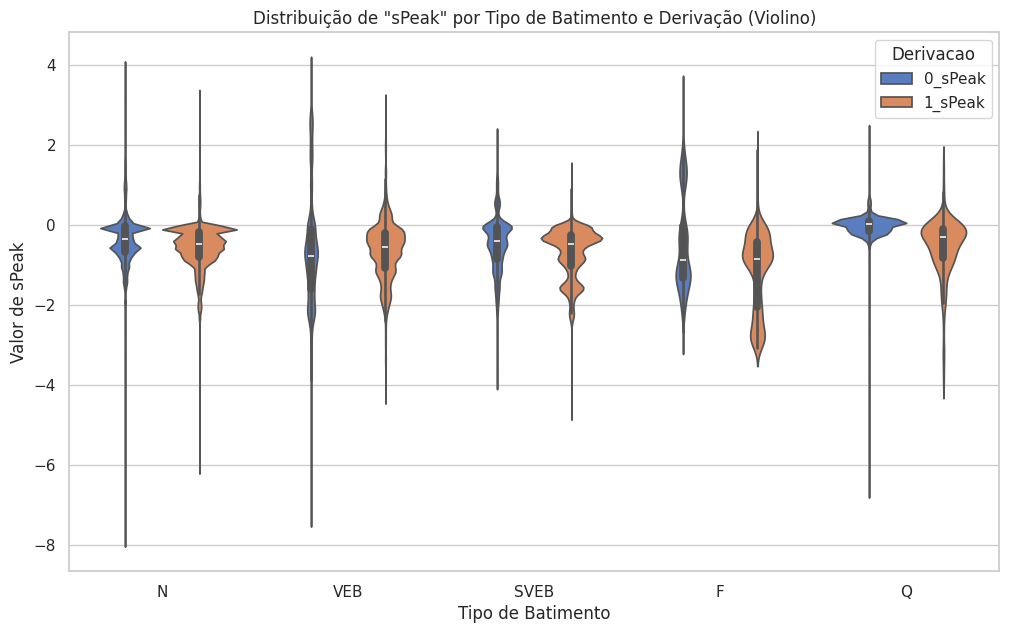

Gerando Histograma para a característica: 'tPeak'


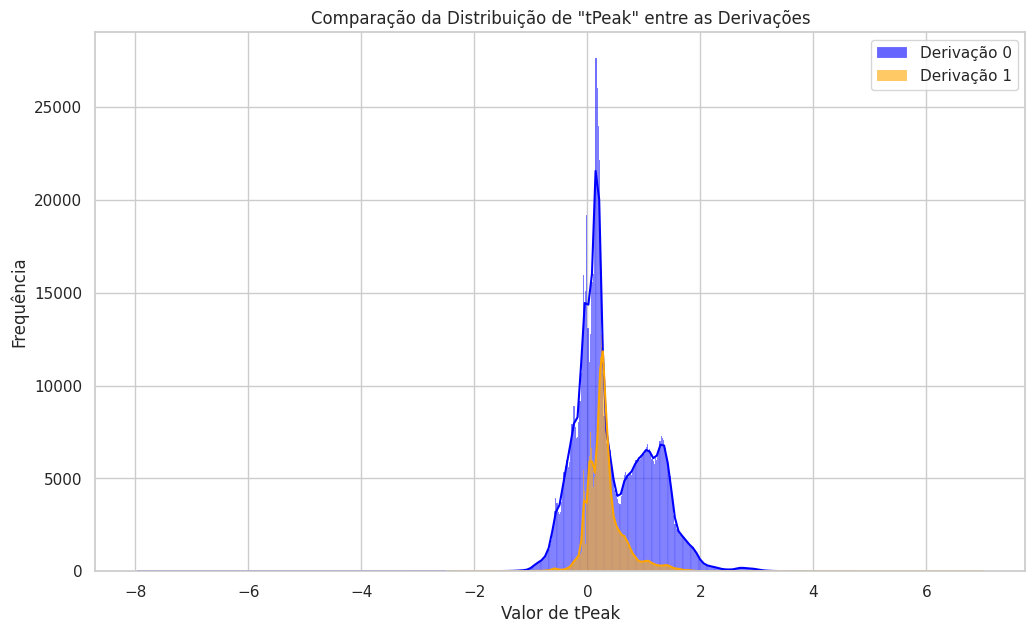

Gerando Boxplot para a característica: 'tPeak'


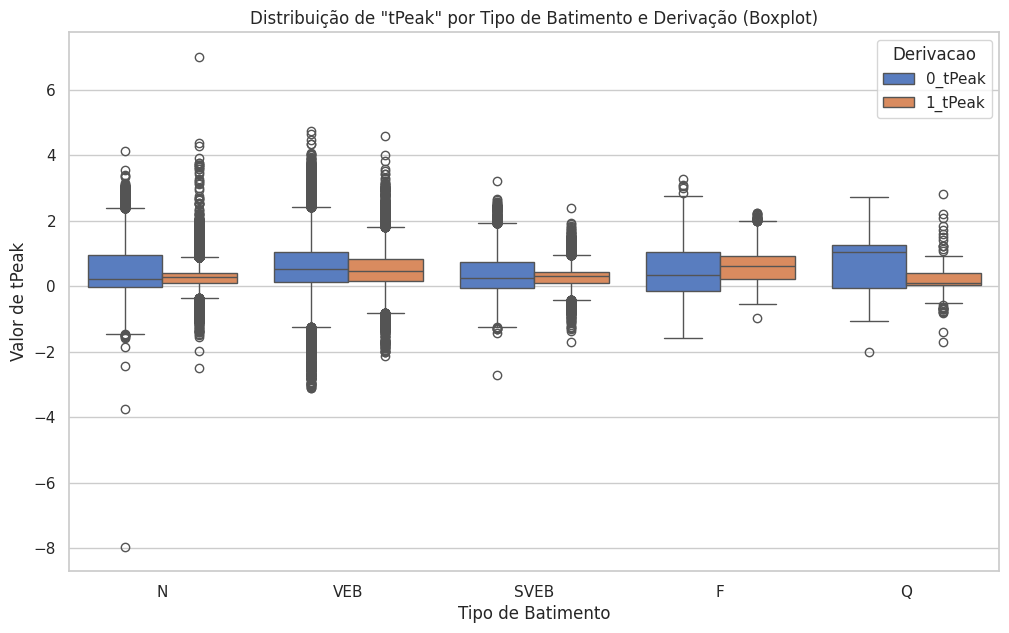

Gerando Gráfico de Violino para a característica: 'tPeak'


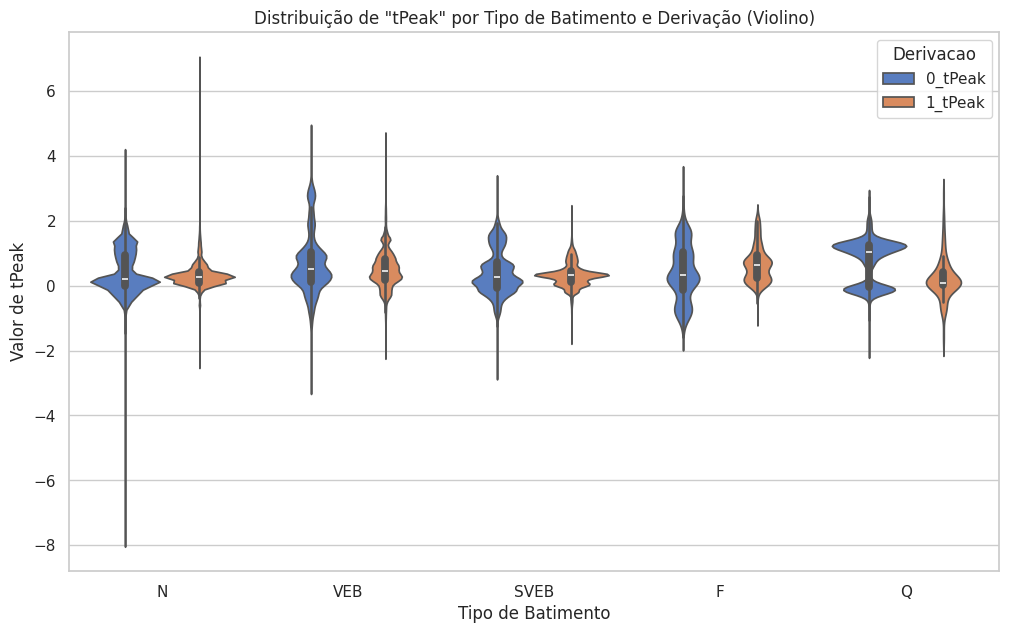

In [36]:
# Analise das variaveis de interesee

# Lista das características base (sem o prefixo da derivação)
caracteristicas_base = [
    'pre-RR', 'post-RR', 'pPeak', 'qrs_interval', 'qt_interval',
    'rPeak', 'sPeak', 'tPeak'
]

# Itera sobre cada característica base para gerar os gráficos
for caracteristica in caracteristicas_base:

    # Cria os nomes das colunas para as duas derivações
    coluna_der_0 = f'0_{caracteristica}'
    coluna_der_1 = f'1_{caracteristica}'

    # Histograma de Comparação
    print(f"Gerando Histograma para a característica: '{caracteristica}'")
    plt.figure(figsize=(12, 7))
    sns.histplot(df[coluna_der_0].dropna(), kde=True, color='blue', label='Derivação 0', alpha=0.6)
    sns.histplot(df[coluna_der_1].dropna(), kde=True, color='orange', label='Derivação 1', alpha=0.6)
    plt.title(f'Comparação da Distribuição de "{caracteristica}" entre as Derivações')
    plt.xlabel(f'Valor de {caracteristica}')
    plt.ylabel('Frequência')
    plt.legend()
    plt.show()

    # Prepara o DataFrame para o Boxplot e o Gráfico de Violino
    df_temp = df[['type', coluna_der_0, coluna_der_1]].copy()
    df_long = pd.melt(df_temp, id_vars=['type'], value_vars=[coluna_der_0, coluna_der_1],
                      var_name='Derivacao', value_name='Valor')

    # Boxplot
    print(f"Gerando Boxplot para a característica: '{caracteristica}'")
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='type', y='Valor', hue='Derivacao', data=df_long)
    plt.title(f'Distribuição de "{caracteristica}" por Tipo de Batimento e Derivação (Boxplot)')
    plt.xlabel('Tipo de Batimento')
    plt.ylabel(f'Valor de {caracteristica}')
    plt.show()

    # Gráfico de Violino
    print(f"Gerando Gráfico de Violino para a característica: '{caracteristica}'")
    plt.figure(figsize=(12, 7))
    sns.violinplot(x='type', y='Valor', hue='Derivacao', data=df_long)
    plt.title(f'Distribuição de "{caracteristica}" por Tipo de Batimento e Derivação (Violino)')
    plt.xlabel('Tipo de Batimento')
    plt.ylabel(f'Valor de {caracteristica}')
    plt.show()

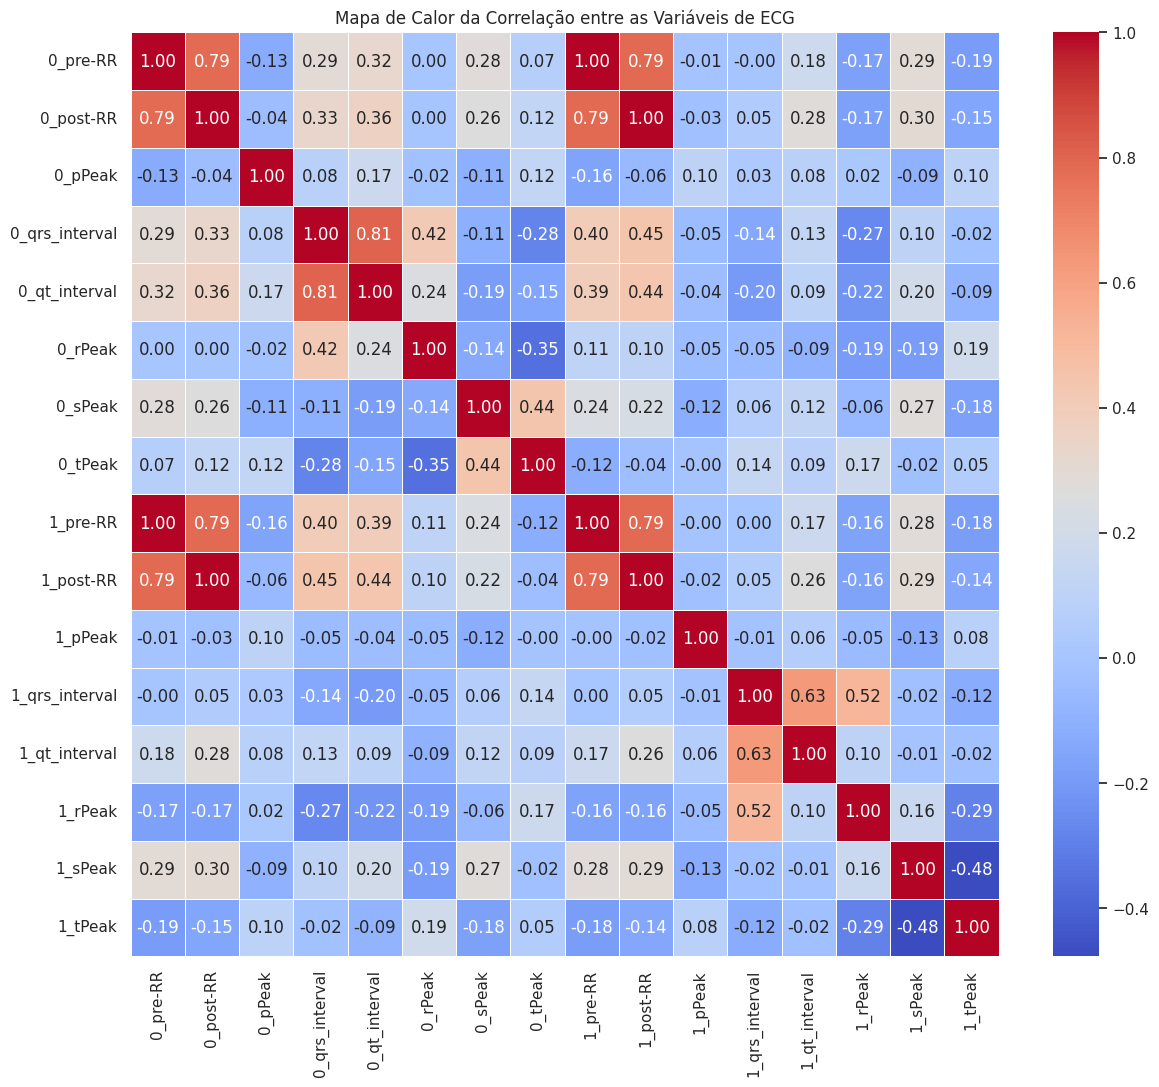

In [38]:
# heatmap, variáveis numéricas de maior interesse para o mapa de calor ambas derivações de ECG
features_heatmap = [
    '0_pre-RR', '0_post-RR', '0_pPeak', '0_qrs_interval', '0_qt_interval', '0_rPeak',
    '0_sPeak', '0_tPeak',
    '1_pre-RR', '1_post-RR', '1_pPeak', '1_qrs_interval', '1_qt_interval', '1_rPeak',
    '1_sPeak', '1_tPeak'
]

# Calcula a matriz de correlação
corr_matrix = df[features_heatmap].corr()

# Define o tamanho da figura e gera o mapa de calor
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Correlação entre as Variáveis de ECG')
plt.show()